# Task 1 - POS Tagger Implementation from scratch

# Viterbi Algorithm

----------------------------------------------------------------------------------------------------------------------

In [53]:
import nltk   

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# nltk.download('treebank')
# nltk.download('movie_reviews')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
from nltk.corpus import treebank as tb, movie_reviews as mr, stopwords
from nltk.stem import WordNetLemmatizer

In [54]:
dataset = list(tb.tagged_sents())
print(len(dataset))

# Dataset visualization
for item in range(5):
    print(len(dataset[item]), dataset[item], sep='\n', end='\n\n')

3914
18
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]

13
[('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')]

27
[('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]

41
[

In [55]:
# Splitting into train and test
# Although test set is not required, splitting a small chunk for visualization purpose

train_set, test_set = train_test_split(dataset, test_size=0.0005, shuffle=False)
print(len(train_set), len(test_set))

3912 2


In [56]:
# Getting list of tagged words
# Each sentence is separated by an end of word like '.'
# So, even is we flatten the sentences list into words list,
# it will not have an impact as it is a bigram mmodel.

train_tagged_words = []
for tagged_sentence in train_set:
    for tagged_word in tagged_sentence:
        train_tagged_words.append(tagged_word)

print(len(train_tagged_words), train_tagged_words[:30], sep='\n\n')

100653

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.'), ('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN')]


In [57]:
words_list = []
tags_list = []
for tagged_word in train_tagged_words:
    words_list.append(tagged_word[0])
    tags_list.append(tagged_word[1])

print(len(words_list), words_list[:30], len(tags_list),  tags_list[:30], sep='\n\n')

100653

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'Vinken', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', ',', 'the', 'Dutch', 'publishing', 'group']

100653

['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.', 'NNP', 'NNP', 'VBZ', 'NN', 'IN', 'NNP', 'NNP', ',', 'DT', 'NNP', 'VBG', 'NN']


In [58]:
unique_tags = list(set(tags_list))
print(len(unique_tags), unique_tags, sep='\n\n', end='\n\n')

unique_words = list(set(words_list))
print(len(unique_words), unique_words[:50], sep='\n\n')

46

['#', 'VB', 'PDT', ':', 'CD', '.', 'JJR', 'WRB', 'WP$', 'RB', 'VBG', 'IN', '``', "''", '-NONE-', 'NN', 'LS', 'DT', 'PRP$', '-LRB-', 'JJS', 'WDT', 'RP', 'JJ', 'UH', 'NNPS', 'VBZ', 'EX', 'RBS', 'FW', 'VBP', 'PRP', 'WP', 'NNP', 'POS', '-RRB-', ',', 'VBN', 'NNS', 'CC', 'VBD', 'TO', 'SYM', 'MD', 'RBR', '$']

12408

['routine', 'Northeast', 'frankly', 'TRUST', '*-92', '*T*-141', 'England', 'Curry', 'Viacom', 'error', 'anti-abortion', 'Laurence', 'liberals', 'experience', 'destroy', 'pressures', 'oversee', 'Plan', 'agreement', 'ankle', 'wedded', 'Keidanren', 'bankroll', '1953', 'Brean', 'terrine', '143.80', 'Friday', '*-144', '*T*-252', 'recognition', 'breaker', 'Psychiatry', 'grants', 'kindness', 'NESB', "'ve", 'growers', 'FAMILY', 'Springfield', 'EXCHANGE', 'hailed', 'high-stakes', 'rare', '1.1', '3,250,000', 'bribery', 'Dingell', 'tracks', 'cleared']


In [59]:
# Compute P(tag_2|tag_1) aka Transition Probability
def transition_probability_calculator(tag_2, tag_1):
    count_tag_1 = 0
    for tag in tags_list:
        if tag == tag_1:
            count_tag_1 += 1
    
    count_tag_2_given_tag1 = 0
    for index in range(len(tags_list) - 1):
        if tags_list[index] == tag_1 and tags_list[index + 1] == tag_2:
            count_tag_2_given_tag1 += 1
    return count_tag_2_given_tag1, count_tag_1

# Visualize an output
transition_probability_calculator('JJ', 'DT')

(1654, 8164)

In [60]:
# Creating a tag_1 x tag_2 transition matrix
# Each column is tag_2 and each row is tag_1
# Thus tags_matrix(i, j) represents P(tag_j|tag_i)

tags_probability_matrix = np.zeros((len(unique_tags), len(unique_tags)), dtype='float32')
for index_1, tag_1 in enumerate(unique_tags):
    for index_2, tag_2 in enumerate(unique_tags):
        transition_probability_count = transition_probability_calculator(tag_2, tag_1)
        tags_probability_matrix[index_1, index_2] = transition_probability_count[0] / transition_probability_count[1]

# Convert the matrix to a data frame for better readability
tags_probability_data_frame = pd.DataFrame(
    tags_probability_matrix,
    columns=unique_tags,
    index=unique_tags
)

In [61]:
tags_probability_data_frame.head()

,#,VB,PDT,:,CD,.,JJR,WRB,WP$,RB,...,",",VBN,NNS,CC,VBD,TO,SYM,MD,RBR,$
#,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
VB,0.0,0.001175,0.002742,0.002350,0.022327,0.015276,0.008226,0.003134,0.000392,0.034861,...,0.012534,0.092440,0.044653,0.007834,0.000783,0.015668,0.0,0.000392,0.007442,0.010576
PDT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
:,0.0,0.005329,0.000000,0.003552,0.110124,0.010657,0.003552,0.005329,0.000000,0.031972,...,0.000000,0.010657,0.035524,0.053286,0.021314,0.001776,0.0,0.014210,0.001776,0.017762
CD,0.0,0.000282,0.000000,0.005358,0.184997,0.049351,0.000846,0.000282,0.000282,0.001974,...,0.059222,0.003384,0.147490,0.013536,0.005358,0.026227,0.0,0.001974,0.000564,0.000000


In [62]:
# Compute P(word|tag) aka Emission Probability
def emission_probability_calculator(word, tag):
    tag_list = []
    for tagged_word in train_tagged_words:
        if tagged_word[1] == tag:
            tag_list.append(tagged_word)
    
    word_given_tag_list = []
    for tagged_word in tag_list:
        if tagged_word[0] == word:
            word_given_tag_list.append(tagged_word)
    return len(word_given_tag_list), len(tag_list)

# Visualize an output
emission_probability_calculator('a', 'DT')

(1874, 8164)

In [63]:
tag_list_for_unique_words = {}
for word in tqdm(unique_words):
    temporary_set = set()
    for tagged_word in train_tagged_words:
        if word == tagged_word[0]:
            temporary_set.add(tagged_word[1])
    tag_list_for_unique_words[word] = list(temporary_set)
for word in tag_list_for_unique_words:
    print(word, tag_list_for_unique_words[word])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12408/12408 [01:23<00:00, 148.36it/s]

routine ['NN', 'JJ']
Northeast ['NN', 'NNP']
frankly ['RB']
TRUST ['NNP']
*-92 ['-NONE-']
*T*-141 ['-NONE-']
England ['NNP']
Curry ['NNP']
Viacom ['NNP']
error ['NN']
anti-abortion ['JJ']
Laurence ['NNP']
liberals ['NNS']
experience ['NN', 'VB']
destroy ['VB']
pressures ['NNS']
oversee ['VB']
Plan ['NNP']
agreement ['NN']
ankle ['NN']
wedded ['VBN']
Keidanren ['NNP']
bankroll ['VBP']
1953 ['CD']
Brean ['NNP']
terrine ['NN']
143.80 ['CD']
Friday ['NNP']
*-144 ['-NONE-']
*T*-252 ['-NONE-']
recognition ['NN']
breaker ['NN']
Psychiatry ['NNP']
grants ['NNS']
kindness ['NN']
NESB ['NNP']
've ['VBP']
growers ['NNS']
FAMILY ['NN']
Springfield ['NNP']
EXCHANGE ['NN']
hailed ['VBN']
high-stakes ['JJ']
rare ['JJ']
1.1 ['CD']
3,250,000 ['CD']
bribery ['NN']
Dingell ['NNP']
tracks ['VBZ']
cleared ['VBD']
... [':']
12-year ['JJ']
piece ['NN']
Riserva ['NNP']
assessed ['VBN']
capitalism ['NN']
250,000 ['CD']
5.5 ['CD']
Inc. ['NNP']
two-year-old ['JJ']
portion ['NN']
government-funded ['JJ']
go ['VB'

In [64]:
# Proper smoothing has also been applied in Vitebri algorithm
def viterbi(words):
    state = []
    previous_probability = {}
    updated_probability = {}
    for tag in unique_tags:
        previous_probability[tag] = 1.0 / len(unique_tags)
        
    for index, word in enumerate(words):
        for tag in unique_tags:
            updated_probability[tag] = 0
        state_max = '-NONE-'
        # Handle if the current word is present in training corpora
        if word in tag_list_for_unique_words:
            max_probability = 0.
            for tag in tag_list_for_unique_words[word]:
                transition_probability = 0.
                if index == 0:
                    # Assuming that their is a punctuation mark before a starting of a sentence
                    # Base case for the starting tag at the start of the sentence
                    transition_probability = tags_probability_data_frame.loc['.', tag]
                else:
                    # Compute transition probabilities from all previous state's tags as it is a bigram model
                    # As we are considering all tags in previous state, iterate
                    # and take max over them and update transition probability
                    
                    # Handle if previous word present in trainging corpora
                    if words[index-1] in tag_list_for_unique_words:
                        for tag_previous in tag_list_for_unique_words[words[index-1]]:
                            transition_probability = max(
                                transition_probability,
                                previous_probability[tag_previous] * tags_probability_data_frame.loc[tag_previous, tag]
                            )
                    # Handle if previous word not present in trainging corpora
                    else:
                        # Taking the probability of choosing only one transition out of all possibilities of previous state
                        for tag_previous in unique_tags:
                            transition_probability = max(
                                transition_probability,
                                previous_probability[tag_previous] * tags_probability_data_frame.loc[tag_previous, tag]
                            )
                
                emission_probability_count = emission_probability_calculator(word, tag)
                emission_probability = emission_probability_count[0] / emission_probability_count[1]
                total_probability = emission_probability * transition_probability
                
                # AS we had already multiplied previous probability with transition probability, we can dirctly update the value in new array
                updated_probability[tag] = total_probability

                if max_probability < total_probability:
                    max_probability = total_probability
                    state_max = tag

            state.append(state_max)
        # Handle if the current word is not present in training corpora
        elif index > 0 and words[index-1] in tag_list_for_unique_words:
            # Emission is not possible here
            max_probability = 0.
            for tag in unique_tags:
                transition_probability = 0.
                for tag_previous in tag_list_for_unique_words[words[index-1]]:
                    calculated_probability = previous_probability[tag_previous] * tags_probability_data_frame.loc[tag_previous, tag]
                    if transition_probability < calculated_probability:
                        transition_probability = calculated_probability
                if max_probability < transition_probability:
                    max_probability = transition_probability
                    state_max = tag
                
                updated_probability[tag] = transition_probability
            state.append(state_max)
        else:
            # If neither of the two words are present in corpus, assign NONE and assign previous probability to updated one
            for tag in unique_tags:
                updated_probability[tag] = previous_probability[tag]
            state.append(state_max)
            
        # Update previous probability
        for tag in unique_tags:
            previous_probability[tag] = updated_probability[tag]
            
    return list(zip(words, state))

In [65]:
test_run_base = [tup for sent in test_set for tup in sent]

test_tagged_words = [tup[0] for sent in test_set for tup in sent]

tagged_seq = viterbi(test_tagged_words)
correct_detction = 0
for predicted, actual in zip(tagged_seq, test_run_base):
    if (predicted==actual):
        correct_detction += 1

accuracy = correct_detction / len(tagged_seq)
print(accuracy)

1.0


# Task 2 - Vanilla Sentiment Analyzer

In [112]:
movie_review_file_ids = mr.fileids()

In [113]:
negative_review = [mr.raw(file_negative) for file_negative in movie_review_file_ids[:1000]]
positive_review = [mr.raw(file_positive) for file_positive in movie_review_file_ids[1000:]]

In [114]:
negative_label = [0 for i in range(len(negative_review))]
positive_label = [1 for i in range(len(positive_review))]

In [115]:
# Getting data frames from arrays

index = [num for num in range(1000)]

positive_data_frame = pd.DataFrame(
    index=index,
    columns=['Review','Sentiment']
)

negative_data_frame = pd.DataFrame(
    index=index,
    columns=['Review','Sentiment']
)

for num  in range(1000):
    positive_data_frame.loc[num,'Review'] = positive_review[num]
    positive_data_frame.loc[num,'Sentiment'] = positive_label[num]
 
    negative_data_frame.loc[num,'Review'] = negative_review[num]
    negative_data_frame.loc[num,'Sentiment'] = negative_label[num]
    
positive_data_frame.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1


In [116]:
negative_data_frame.head()

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [117]:
data_frame = pd.concat(
    [positive_data_frame, negative_data_frame],
    ignore_index=True
)
data_frame

,Review,Sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


In [118]:
index = 0

stop_words = set(stopwords.words('english'))
for item in data_frame['Review']:
    tokens = word_tokenize(item)
    
    lemmatized_token = set()
    for token in tokens:
        if token not in stop_words:
            lemmatized_token.add(WordNetLemmatizer().lemmatize(token))
    
    tokenized_string = " ".join(lemmatized_token)
    data_frame.loc[index, "Review"] = tokenized_string
    
    index += 1
data_frame

,Review,Sentiment
0,helped keeping saw surprising jackson '80s blo...,1
1,year probably mr come movie detail sting fun c...,1
2,inventive opening comparison year come movie h...,1
3,presence ship hollywood simply single institut...,1
4,gaping hollywood fight movie cent le cutting s...,1
...,...,...
1995,hollywood clumsily mr detail soon gift play fi...,0
1996,reaching hollywood kill keeping old-style reso...,0
1997,ensuing hall movie fun come create distributio...,0
1998,come movie katrina james ian mouth sunlight fi...,0


In [119]:
# Applying TF-IDF alongwith stop word's removal

feature_vectorizer = TfidfVectorizer(stop_words=list(set(stopwords.words('english'))))
X = feature_vectorizer.fit_transform(data_frame['Review'])
Y = data_frame['Sentiment']

In [120]:
# Create a DataFrame from extraced features

data_frame_extracted_features = pd.DataFrame(
    X.toarray(),
    columns=feature_vectorizer.get_feature_names_out()
)
data_frame_extracted_features

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.075366,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.04415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
label_encoder = LabelEncoder()
data_frame_extracted_features['Sentiment'] = label_encoder.fit_transform(data_frame['Sentiment'])

In [122]:
x_train, x_test, y_train, y_test = train_test_split(
    data_frame_extracted_features.drop(['Sentiment'], axis=1),
    data_frame_extracted_features['Sentiment'],
    test_size=0.3
)

In [123]:
x_train[:5]

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10537,0.0,0.0


In [124]:
x_test[:5]

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
826,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1523,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
911,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1789,0.0,0.057043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
y_train[:5]

891     1
795     1
1233    0
1529    0
527     1
Name: Sentiment, dtype: int64

In [126]:
y_test[:5]

826     1
444     1
1523    0
911     1
1789    0
Name: Sentiment, dtype: int64

In [127]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 35446)
(600, 35446)
(1400,)
(600,)


In [128]:
# GAUSSIAN NAIVE BAYES

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(x_train, y_train)
prediction = gaussian_classifier.predict(x_test)

In [129]:
print("Accuracy :" , accuracy_score(prediction, y_test)) 
print("Classification Report for Gaussian Naive Bayes: \n" + classification_report(prediction, y_test))

Accuracy : 0.6616666666666666
Classification Report for Gaussian Naive Bayes: 
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       266
           1       0.72      0.65      0.68       334

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.67      0.66      0.66       600



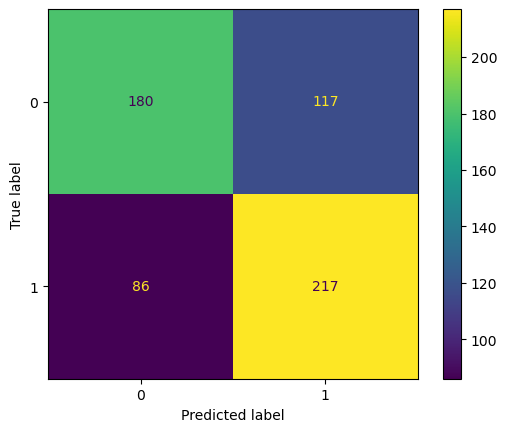

In [130]:
confusion_mat = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
display.plot()
plt.show()

In [131]:
# LOGISTIC REGRESSION

logistic_regression = LogisticRegression(C=173)
logistic_regression.fit(x_train,y_train)
prediction = logistic_regression.predict(x_test)

In [132]:
print("Accuracy :" , accuracy_score(prediction, y_test)) 
print("Classification Report for Logistic Regression: \n" + classification_report(prediction, y_test))

Accuracy : 0.8716666666666667
Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       286
           1       0.89      0.86      0.88       314

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



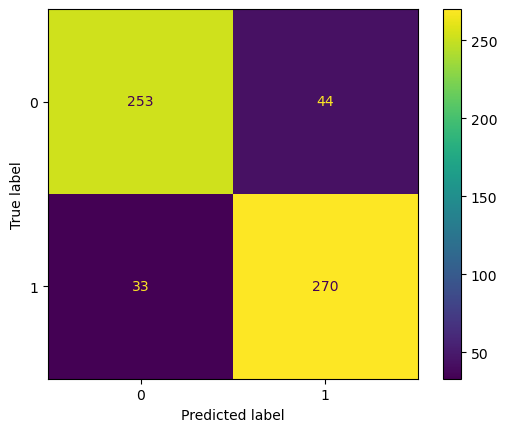

In [133]:
confusion_mat = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
display.plot()
plt.show()

# Task 3 - Improved Sentiment Analyzer 

In [88]:
movie_review_file_ids = mr.fileids()

In [390]:
negative_review = [mr.raw(file_negative) for file_negative in file_ids[:1000]]
positive_review = [mr.raw(file_positive) for file_positive in file_ids[1000:]]

In [89]:
negative_label = [0 for i in range(len(negative_review))]
positive_label = [1 for i in range(len(positive_review))]

In [90]:
# Getting data frames from arrays

index = [num for num in range(1000)]

positive_data_frame = pd.DataFrame(
    index=index,
    columns=['Review','Sentiment']
)

negative_data_frame = pd.DataFrame(
    index=index,
    columns=['Review','Sentiment']
)

for num  in range(1000):
    positive_data_frame.loc[num,'Review'] = positive_review[num]
    positive_data_frame.loc[num,'Sentiment'] = positive_label[num]
 
    negative_data_frame.loc[num,'Review'] = negative_review[num]
    negative_data_frame.loc[num,'Sentiment'] = negative_label[num]
    
positive_data_frame.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1


In [91]:
negative_data_frame.head()

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [92]:
data_frame = pd.concat(
    [positive_data_frame, negative_data_frame],
    ignore_index=True
)
data_frame

,Review,Sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


In [94]:
lemmatizer = WordNetLemmatizer()
index = 0

stop_words = set(stopwords.words('english'))
for item in tqdm(data_frame['Review']):
    tokens = word_tokenize(item)
    
    lemmatized_token = []
    for token in tokens:
        if token not in stop_words:
            lemmatized_token.append(lemmatizer.lemmatize(token))
    
    vitebri_output = viterbi(lemmatized_token)
    vitebri_token = []
    for item in vitebri_output:
        vitebri_token.append(item[0] + ":<" + item[1] + ">")
    tokenized_string = " ".join(vitebri_token)
#     print(tokenized_string)
    data_frame.loc[index, "Review"] = tokenized_string
    
    index += 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [1:01:00<00:00,  1.83s/it]


In [96]:
data_frame

,Review,Sentiment
0,film:<NN> ::<:> <:<NNP> NN:<-NONE-> >:<-NONE->...,1
1,every:<DT> ::<:> <:<NNP> DT:<-NONE-> >:<-NONE-...,1
2,'ve:<-NONE-> ::<-NONE-> <:<-NONE-> -NONE-:<-NO...,1
3,``:<``> ::<-NONE-> <:<-NONE-> ``:<-NONE-> >:<-...,1
4,moviemaking:<-NONE-> ::<:> <:<NNP> -NONE-:<-NO...,1
...,...,...
1995,"anything:<NN> ,:<,> ``:<``> stigma:<NN> ``:<``...",0
1996,john:<-NONE-> boorman:<-NONE-> 's:<POS> ``:<``...,0
1997,kid:<-NONE-> hall:<-NONE-> acquired:<VBN> tast...,0
1998,time:<NN> john:<IN> carpenter:<-NONE-> great:<...,0


In [97]:
# Applying TF-IDF alongwith stop word's removal

feature_vectorizer = TfidfVectorizer(stop_words=list(set(stopwords.words('english'))))
X = feature_vectorizer.fit_transform(data_frame['Review'])
Y = data_frame['Sentiment']

In [98]:
# Create a DataFrame from extraced features

data_frame_extracted_features = pd.DataFrame(
    X.toarray(),
    columns=feature_vectorizer.get_feature_names_out()
)
data_frame_extracted_features

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.002063,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
label_encoder = LabelEncoder()
data_frame_extracted_features['Sentiment'] = label_encoder.fit_transform(data_frame['Sentiment'])

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    data_frame_extracted_features.drop(['Sentiment'], axis=1),
    data_frame_extracted_features['Sentiment'],
    test_size=0.3
)

In [101]:
x_train[:5]

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
x_test[:5]

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
y_train[:5]

816     1
1686    0
690     1
1246    0
919     1
Name: Sentiment, dtype: int64

In [104]:
y_test[:5]

1871    0
257     1
1099    0
966     1
1766    0
Name: Sentiment, dtype: int64

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 35470)
(600, 35470)
(1400,)
(600,)


In [106]:
# GAUSSIAN NAIVE BAYES

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(x_train, y_train)
prediction = gaussian_classifier.predict(x_test)

In [107]:
print("Accuracy :" , accuracy_score(prediction, y_test)) 
print("Classification Report for Gaussian Naive Bayes: \n" + classification_report(prediction, y_test))

Accuracy : 0.665
Classification Report for Gaussian Naive Bayes: 
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       248
           1       0.76      0.63      0.69       352

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.66       600
weighted avg       0.68      0.67      0.67       600



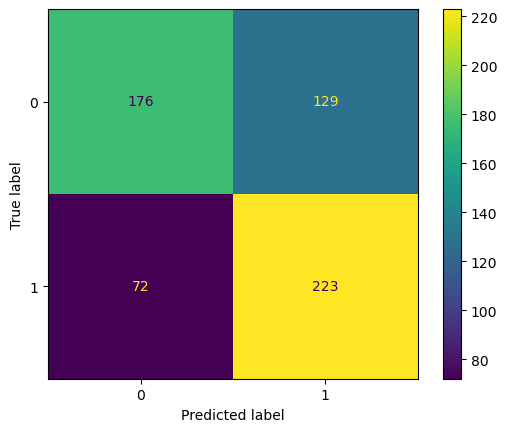

In [108]:
confusion_mat = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
display.plot()
plt.show()

In [109]:
# LOGISTIC REGRESSION

logistic_regression = LogisticRegression(C=173)
logistic_regression.fit(x_train,y_train)
prediction = logistic_regression.predict(x_test)

/home/naqueer_am/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
print("Accuracy :" , accuracy_score(prediction, y_test)) 
print("Classification Report for Logistic Regression: \n" + classification_report(prediction, y_test))

Accuracy : 0.8566666666666667
Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       301
           1       0.86      0.85      0.86       299

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



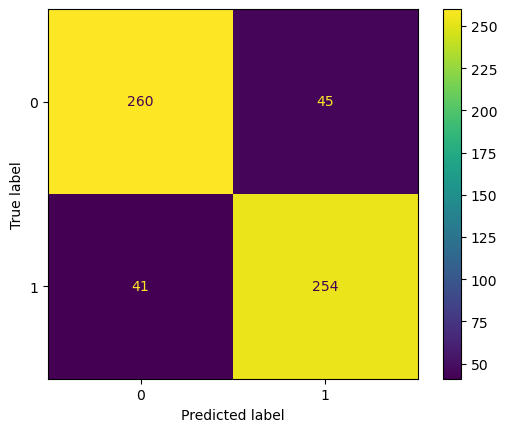

In [111]:
confusion_mat = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
display.plot()
plt.show()